# Multiclass classification to predict the Efficacy of an active G9a inhibitor using data_set_3
https://scikit-learn.org/stable/modules/multiclass.html

### Content   <a name="content"></a>

1. [Data loading and observations](#1)
2. [Dividing the range of efficacy into four classes](#2)
3. [Balancing data ](#3)
4. [ML with Random Forest Classifier](#4)
5. [Overfitting exploration](#5)
6. [Feature importance. Two methods comparison](#6)
7. [Final result](#7)

## Data loading and observations <a name="1"></a>

In [1]:
# pip install modin[ray] 
# pip install sidetable

In [2]:
import pandas as pd 

# # loading the dataset for the regression ML
df = pd.read_csv('data_Efficacy_with_solub_and_no_imputation.csv', index_col=[0])
# Avoid some columns to be truncated during df display
pd.set_option('display.max_columns', None)
# Display the data frame
print('Shape of df: ', df.shape)
df.head()

Shape of df:  (3910, 61)


,Efficacy,MW,TPSA,XL,HAC,HBDC,HBAC,RBC,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,Volume_1,Volume_2,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D,Volume_1_3D,XY_3D_volume,XZ_3D_volume,YZ_3D_volume,C_relative,H_relative,O_relative,S_relative,N_relative,Br_relative,Cl_relative,F_relative,C,H,O,S,N,Br,Cl,F,C_rel_2D,allAtoms_rel_2D,C_rel_XY_3D,allAtoms_rel_XY_3D,C_rel_XZ_3D,allAtoms_rel_XZ_3D,C_rel_YZ_3D,allAtoms_rel_YZ_3D,Similarity,Solubility_at_pH_7_4
0,72.9655,278.29,125.0,22.2,19,1,6,2,1,6.6342,8.9727,20.089578,19.643204,10.0201,10.0201,19.512813,19.724724,10.703674,3.062773e-01,10.4533,13.4223,20.485431,20.053612,2.9936,5.1742,20.513676,20.355558,1.1650,3.0878,17.575617,18.545417,154.967504,22.341853,20.810366,20.061954,0.38,0.34,0.10,0.03,0.14,0.0,0.0,0.0,47.48,3.62,17.25,11.52,20.13,0.0,0.0,0.0,20.662089,20.895470,3.491883,2.594082,8.972790,4.346881,2.569614,1.675691,20.065,0.1
1,147.3170,358.40,143.0,23.4,24,3,7,5,1,7.0834,7.2974,19.929298,20.028400,12.5835,12.5835,20.114455,20.268933,0.000006,2.241061e-07,11.7024,13.8931,20.065879,20.130764,6.9136,8.9136,19.069242,19.533020,2.4349,4.3407,19.789750,19.952041,69.723704,20.040203,20.078547,20.012436,0.42,0.37,0.05,0.05,0.11,0.0,0.0,0.0,53.62,3.94,8.93,17.89,15.63,0.0,0.0,0.0,20.562912,20.579918,1.692664,1.558641,4.806111,3.200659,2.839377,2.053494,20.054,13.7
2,174.8850,293.28,95.1,23.1,22,2,6,3,1,6.4686,6.4686,20.643863,20.698222,11.2534,11.8613,20.319010,20.365890,0.003303,5.384583e-06,10.1926,12.9043,20.323032,20.324770,4.9932,7.6809,20.171935,19.992688,0.6980,1.1042,19.684257,19.746330,8.764451,21.172396,20.104192,20.209574,0.48,0.33,0.09,0.00,0.09,0.0,0.0,0.0,65.53,3.78,16.37,0.00,14.33,0.0,0.0,0.0,20.574813,20.545353,2.041296,1.680051,14.602579,11.686560,7.153582,6.956077,20.050,24.7
3,189.2240,324.40,70.9,23.8,24,2,4,6,1,15.3302,15.3302,19.936493,19.962066,7.2036,7.2036,19.776341,19.850233,0.000000,3.739519e-09,12.6857,14.2391,19.675916,19.694560,7.6102,8.9715,19.346611,19.397476,2.7585,4.4880,20.219574,20.105079,13.375666,20.014993,20.059015,20.040756,0.43,0.45,0.07,0.00,0.05,0.0,0.0,0.0,70.35,6.21,14.80,0.00,8.64,0.0,0.0,0.0,22.128130,22.128130,1.666934,1.587148,4.598767,3.172705,2.758818,1.998997,20.059,1.0
4,166.8680,410.50,124.0,24.4,29,3,7,7,1,16.8859,16.8859,20.085001,19.999575,9.6230,11.9205,20.105757,20.021858,9.625909,5.822748e-02,13.1863,15.5571,19.995282,20.086889,7.4717,9.5477,21.094927,20.563269,3.4022,5.2265,19.421458,19.497382,80.618934,20.802356,20.111462,20.517832,0.41,0.43,0.06,0.02,0.08,0.0,0.0,0.0,61.45,5.40,11.69,7.81,13.65,0.0,0.0,0.0,21.754744,21.416543,1.764833,1.629408,3.875816,2.976581,2.196138,1.826787,20.054,9.7


In [3]:
# Check for NaN
df.isnull().values.any()

False

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3910 entries, 0 to 3909
Data columns (total 61 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Efficacy              3910 non-null   float64
 1   MW                    3910 non-null   float64
 2   TPSA                  3910 non-null   float64
 3   XL                    3910 non-null   float64
 4   HAC                   3910 non-null   int64  
 5   HBDC                  3910 non-null   int64  
 6   HBAC                  3910 non-null   int64  
 7   RBC                   3910 non-null   int64  
 8   CBUC                  3910 non-null   int64  
 9   MMX6                  3910 non-null   float64
 10  MMX                   3910 non-null   float64
 11  SX6                   3910 non-null   float64
 12  SX                    3910 non-null   float64
 13  MMY6                  3910 non-null   float64
 14  MMY                   3910 non-null   float64
 15  SY6                   3910

In [5]:
df.describe(include="all")

,Efficacy,MW,TPSA,XL,HAC,HBDC,HBAC,RBC,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,Volume_1,Volume_2,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D,Volume_1_3D,XY_3D_volume,XZ_3D_volume,YZ_3D_volume,C_relative,H_relative,O_relative,S_relative,N_relative,Br_relative,Cl_relative,F_relative,C,H,O,S,N,Br,Cl,F,C_rel_2D,allAtoms_rel_2D,C_rel_XY_3D,allAtoms_rel_XY_3D,C_rel_XZ_3D,allAtoms_rel_XZ_3D,C_rel_YZ_3D,allAtoms_rel_YZ_3D,Similarity,Solubility_at_pH_7_4
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.0,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3.910000e+03,3.910000e+03,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3.910000e+03,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.00000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,132.946193,299.792608,79.740605,22.741790,20.890281,1.320972,4.269821,3.653197,1.0,9.593170,10.283733,20.025411,20.023448,8.156124,8.761234,19.947922,19.975281,8.839811e+00,5.250568e-02,10.216495,12.302156,20.009058,20.016798,4.623222,6.682458,20.001535,20.000059,2.295846,4.036754,19.993442,19.992171,6.639251e+01,20.484385,20.860596,20.760633,0.414731,0.416297,0.059148,0.018338,0.08033,0.001184,0.005192,0.004148,60.253862,5.195637,11.098957,6.569281,13.241939,0.877284,1.908578,0.854535,21.405104,21.341317,2.466931,1.933868,156.840848,60.109337,69.194167,33.528364,20.055876,24.391445
std,29.298979,46.451019,31.028478,1.138304,3.468011,0.910441,1.545286,1.738444,0.0,2.914391,2.756242,0.303383,0.268621,2.885100,2.709377,0.365838,0.298546,5.201384e+01,2.906268e-01,2.447613,2.373278,0.324318,0.259735,1.472700,1.406965,0.442283,0.292805,1.104470,1.323772,0.584236,0.408079,8.479359e+01,1.675376,11.402860,11.319885,0.045315,0.067075,0.042052,0.021937,0.04077,0.006493,0.014833,0.016690,9.475151,1.503883,7.415527,7.322516,6.119205,4.659358,5.127845,3.194685,0.929411,0.695670,1.111839,0.600992,979.422684,571.645953,468.123140,339.487127,0.015479,17.231800
min,62.000400,97.070000,3.200000,16.300000,7.000000,0.000000,1.000000,0.000000,1.0,1.963500,2.605200,18.787935,19.122281,0.750000,1.950000,18.691621,18.928861,0.000000e+00,2.260095e-38,2.145400,4.589300,18.534780,19.082458,0.394700,3.024900,17.909794,18.886292,0.000300,0.000500,16.897940,14.612511,3.807599e-07,20.000129,20.000000,20.000007,0.170000,0.140000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,20.830000,0.890000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.158514,20.158514,0.576067,0.798337,1.002917,0.908398,0.260297,0.683794,20.011000,0.100000
25%,112.541500,271.290000,58.900000,22.000000,19.000000,1.000000,3.000000,2.000000,1.0,7.540725,8.485000,19.833757,19.855880,5.988400,6.739075,19.717026,19.775284,1.579800e-18,3.813652e-06,8.524675,10.603300,19.815160,19.853884,3.483325,5.595400,19.737870,19.822481,1.585225,3.311075,19.733393,19.826040,2.830925e+01,20.061518,20.040245,20.042456,0.380000,0.370000,0.030000,0.000000,0.05000,0.000000,0.000000,0.000000,53.980000,4.120000,5.402500,0.000000,8.910000,0.000000,0.000000,0.000000,20.822175,20.842512,1.668023,1.477675,3.207464,2.371279,1.468679,1.321189,20.046000,6.300000
50%,131.586500,303.400000,78.400000,22.800000,21.000000,1.000000,4.000000,3.000000,1.0,9.137300,10.112800,20.004489,20.004154,7.903700,8.707100,19.956295,19.975617,8.338993e-02,3.778434e-04,10.089450,12.181650,20.003206,20.018748,4.533750,6.563050,20.000197,20.001907,2.417550,4.265900,19.998384,19.997910,4.623445e+01,20.162119,20.110584,20.112234,0.420000,0.420000,0.060000,0.020000,0.07000,0.000000,0.000000,0.000000,60.590000,5.080000,10.65000

[<a href="#content">Back to top</a>]

## Dividing the range of efficacy into four classes <a name="2"></a>

In [6]:
# Efficacy min 31.1299
# Efficacy max 299.718
# Difference 268.5881
# 4 classes distinct by 67: from 31.1299 to 98; 165; 232; 299.718
# https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/#:~:text=To%20accomplish%20this%2C%20we%E2%80%99ll%20use%20numpy%E2%80%99s%20built-in%20where%28%29,condition%20is%20true%2C%20value%20if%20condition%20is%20false%29
import numpy as np

# Create a list of conditions
conditions = [
    (df['Efficacy'] <= 98),
    (df['Efficacy'] >98) & (df['Efficacy']<=165),
    (df['Efficacy'] >165) & (df['Efficacy']<=232),
    (df['Efficacy'] >232)
]

# Create a lsit of values
values = ['1', '2', '3', '4']

# Create a new column and use np.select to assign values to it using the lists as arguments
df['target'] = np.select(conditions, values)

# display the updated DataFrame
df.head() 

,Efficacy,MW,TPSA,XL,HAC,HBDC,HBAC,RBC,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,Volume_1,Volume_2,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D,Volume_1_3D,XY_3D_volume,XZ_3D_volume,YZ_3D_volume,C_relative,H_relative,O_relative,S_relative,N_relative,Br_relative,Cl_relative,F_relative,C,H,O,S,N,Br,Cl,F,C_rel_2D,allAtoms_rel_2D,C_rel_XY_3D,allAtoms_rel_XY_3D,C_rel_XZ_3D,allAtoms_rel_XZ_3D,C_rel_YZ_3D,allAtoms_rel_YZ_3D,Similarity,Solubility_at_pH_7_4,target
0,72.9655,278.29,125.0,22.2,19,1,6,2,1,6.6342,8.9727,20.089578,19.643204,10.0201,10.0201,19.512813,19.724724,10.703674,3.062773e-01,10.4533,13.4223,20.485431,20.053612,2.9936,5.1742,20.513676,20.355558,1.1650,3.0878,17.575617,18.545417,154.967504,22.341853,20.810366,20.061954,0.38,0.34,0.10,0.03,0.14,0.0,0.0,0.0,47.48,3.62,17.25,11.52,20.13,0.0,0.0,0.0,20.662089,20.895470,3.491883,2.594082,8.972790,4.346881,2.569614,1.675691,20.065,0.1,1
1,147.3170,358.40,143.0,23.4,24,3,7,5,1,7.0834,7.2974,19.929298,20.028400,12.5835,12.5835,20.114455,20.268933,0.000006,2.241061e-07,11.7024,13.8931,20.065879,20.130764,6.9136,8.9136,19.069242,19.533020,2.4349,4.3407,19.789750,19.952041,69.723704,20.040203,20.078547,20.012436,0.42,0.37,0.05,0.05,0.11,0.0,0.0,0.0,53.62,3.94,8.93,17.89,15.63,0.0,0.0,0.0,20.562912,20.579918,1.692664,1.558641,4.806111,3.200659,2.839377,2.053494,20.054,13.7,2
2,174.8850,293.28,95.1,23.1,22,2,6,3,1,6.4686,6.4686,20.643863,20.698222,11.2534,11.8613,20.319010,20.365890,0.003303,5.384583e-06,10.1926,12.9043,20.323032,20.324770,4.9932,7.6809,20.171935,19.992688,0.6980,1.1042,19.684257,19.746330,8.764451,21.172396,20.104192,20.209574,0.48,0.33,0.09,0.00,0.09,0.0,0.0,0.0,65.53,3.78,16.37,0.00,14.33,0.0,0.0,0.0,20.574813,20.545353,2.041296,1.680051,14.602579,11.686560,7.153582,6.956077,20.050,24.7,3
3,189.2240,324.40,70.9,23.8,24,2,4,6,1,15.3302,15.3302,19.936493,19.962066,7.2036,7.2036,19.776341,19.850233,0.000000,3.739519e-09,12.6857,14.2391,19.675916,19.694560,7.6102,8.9715,19.346611,19.397476,2.7585,4.4880,20.219574,20.105079,13.375666,20.014993,20.059015,20.040756,0.43,0.45,0.07,0.00,0.05,0.0,0.0,0.0,70.35,6.21,14.80,0.00,8.64,0.0,0.0,0.0,22.128130,22.128130,1.666934,1.587148,4.598767,3.172705,2.758818,1.998997,20.059,1.0,3
4,166.8680,410.50,124.0,24.4,29,3,7,7,1,16.8859,16.8859,20.085001,19.999575,9.6230,11.9205,20.105757,20.021858,9.625909,5.822748e-02,13.1863,15.5571,19.995282,20.086889,7.4717,9.5477,21.094927,20.563269,3.4022,5.2265,19.421458,19.497382,80.618934,20.802356,20.111462,20.517832,0.41,0.43,0.06,0.02,0.08,0.0,0.0,0.0,61.45,5.40,11.69,7.81,13.65,0.0,0.0,0.0,21.754744,21.416543,1.764833,1.629408,3.875816,2.976581,2.196138,1.826787,20.054,9.7,3


In [7]:
df['target'].value_counts()

target
2    2936
3     501
1     458
4      15
Name: count, dtype: int64

In [8]:
df.shape

(3910, 62)

[<a href="#content">Back to top</a>]

## Balancing data  <a name="3"></a>

In [9]:
# Split the training columns from the columns with the targets
X = df.drop(columns=['target', 'Efficacy'], axis=1)
y = df['target']

[('1', 458), ('2', 2936), ('3', 501), ('4', 15)]


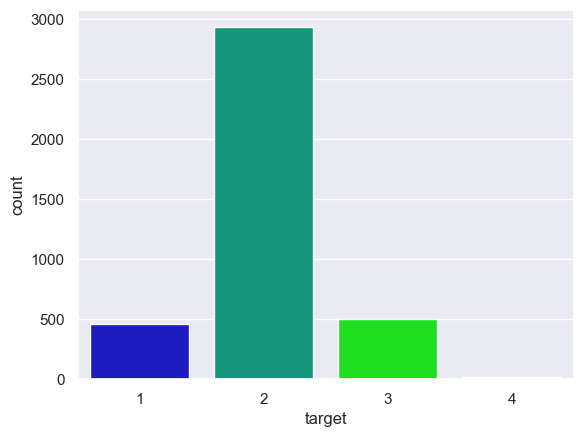

In [10]:
from collections import Counter
from matplotlib import pyplot as plt
import seaborn as sns

# Illustrate the imbalance between classification targets 
print(sorted(Counter(y).items()))
sns.set_style('white')
sns.set(font_scale=1)
plt.figure()
sns.countplot(x=y, hue=y, palette='nipy_spectral')
plt.show()

[('1', 2936), ('2', 2936), ('3', 2936), ('4', 2936)]


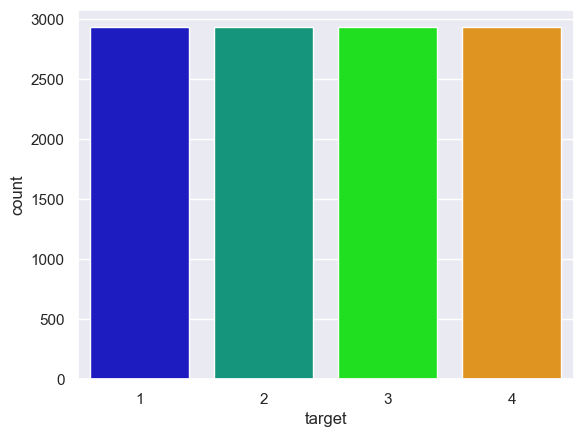

In [11]:
from imblearn.over_sampling import SMOTE

# Balance targets with Synthetic Minority Oversampling Technique
smote = SMOTE(random_state=0)
X, y = smote.fit_resample(X, y)

# Illustrate the balance between classification targets 
print(sorted(Counter(y).items()))
sns.set_style('white')
sns.set(font_scale=1)
plt.figure()
sns.countplot(x=y, hue=y,palette='nipy_spectral')
plt.show()

[<a href="#content">Back to top</a>]

## ML with Random Forest Classifier <a name="4"></a>

In [12]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data set into train and test parts 
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y,
                                                                      test_size=0.20,
                                                                      random_state=5, 
                                                                      shuffle=True) 
# # Standardise the data points
sc = StandardScaler()
X_train = sc.fit_transform(X_train_unscaled)
X_test = sc.transform(X_test_unscaled)

# Print the shape of each part
print("Shapes:")
print("X_train: ", X_train.shape)
print("X_test:  ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test:  ", y_test.shape)

Shapes:
X_train:  (9395, 60)
X_test:   (2349, 60)
y_train:  (9395,)
y_test:   (2349,)


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, auc
from sklearn.multiclass import OneVsRestClassifier

# model = OneVsRestClassifier(RandomForestClassifier()).fit(X_train, y_train) 
model = RandomForestClassifier(random_state=1).fit(X_train, y_train) 

pred = model.predict(X_test) 
  
print("Accuracy:", round(accuracy_score(y_test, pred),3))

Accuracy: 0.929


In [14]:
from sklearn.model_selection import cross_val_score

clf = (RandomForestClassifier(random_state=1))
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
scores

array([0.89016603, 0.93316305, 0.94550873, 0.93103448, 0.92376491])

In [15]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.92 accuracy with a standard deviation of 0.02


[<a href="#content">Back to top</a>]

## Overfitting exploration <a name="5"></a>

In [16]:
from sklearn.metrics import accuracy_score

# Evaluate random forest classifier performance on train and test sets with different tree depths
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model_ = RandomForestClassifier(max_depth=i) 
 # fit model_ on the training dataset
 model_.fit(X_train, y_train)
 # evaluate on the train dataset
 train_yhat = model_.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model_.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.454, test: 0.456
>2, train: 0.510, test: 0.518
>3, train: 0.570, test: 0.568
>4, train: 0.624, test: 0.603
>5, train: 0.717, test: 0.670
>6, train: 0.798, test: 0.722
>7, train: 0.873, test: 0.774
>8, train: 0.924, test: 0.814
>9, train: 0.959, test: 0.842
>10, train: 0.980, test: 0.869
>11, train: 0.992, test: 0.884
>12, train: 0.995, test: 0.899
>13, train: 0.998, test: 0.905
>14, train: 0.999, test: 0.911
>15, train: 0.999, test: 0.920
>16, train: 0.999, test: 0.921
>17, train: 0.999, test: 0.924
>18, train: 0.999, test: 0.928
>19, train: 1.000, test: 0.923
>20, train: 1.000, test: 0.925


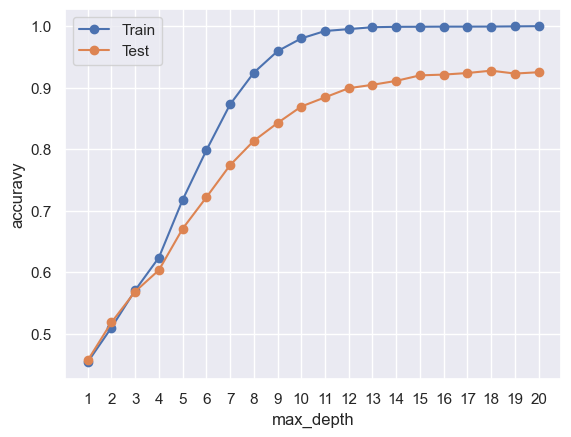

In [17]:
import math
import matplotlib.pyplot as plt

# Set integers for x axis
new_x_ticks = range(math.floor(min(values)), math.ceil(max(values))+1)
plt.xticks(new_x_ticks)
# Plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.xlabel("max_depth")
plt.ylabel("accuravy")
plt.show()

[<a href="#content">Back to top</a>]